<a href="https://colab.research.google.com/github/AritraStark/CIFAR10_TF/blob/main/CIFAR10cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CIFAR 10 image classification**

Setting up imports

In [2]:
!pip install tensorflow==2.8.0

import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

print(tf.__version__)

2.8.0


Initializing dataset and variables

In [15]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = y_train.flatten()
y_test = y_test.flatten()

Setting up names of classes to classify the images to and plot the classes in a graph



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[[Text(0, 0, 'airplane'),
  Text(0, 0, 'automobile'),
  Text(0, 0, 'bird'),
  Text(0, 0, 'cat'),
  Text(0, 0, 'deer'),
  Text(0, 0, 'dog'),
  Text(0, 0, 'frog'),
  Text(0, 0, 'horse'),
  Text(0, 0, 'ship'),
  Text(0, 0, 'truck')]]

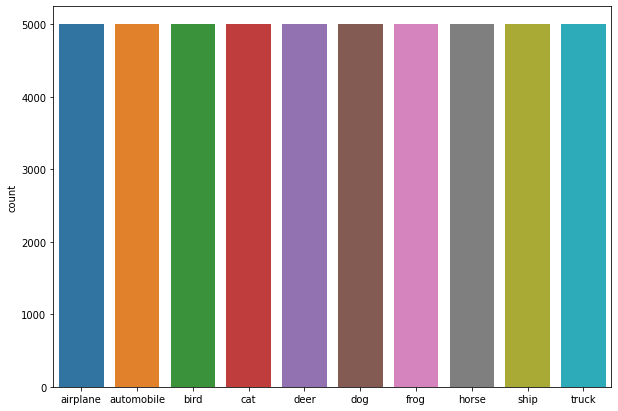

In [16]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,7))
p = sns.countplot(y_train.flatten())
p.set(xticklabels=classes)

Define input shape and reshape the train and test matrices into vectors, then normalize their rgb values into values between 0 and 1.


In [18]:
input_shape = (32, 32, 3)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)

x_train=x_train / 255.0
x_test=x_test / 255.0

Making the Y values one hot so that only the result has value of 1 and rest values will be 0

In [19]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

Visualising data

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], shape=(10,), dtype=float32)


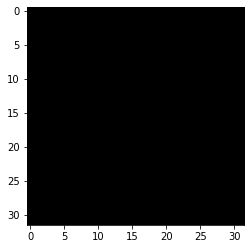

In [21]:
plt.imshow(x_train[100])
print(y_train[100])

Defining the CNN model

In [22]:
batch_size = 32
num_classes = 10
epochs = 50


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06), loss='categorical_crossentropy', metrics=['acc'])

Fitting the data as well and training

In [23]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/50
1563/1563 [==============================] - 233s 148ms/step - loss: 2.1398 - acc: 0.2113
Epoch 2/50
1563/1563 [==============================] - 236s 151ms/step - loss: 1.9856 - acc: 0.2872
Epoch 3/50
1563/1563 [==============================] - 238s 152ms/step - loss: 1.8914 - acc: 0.3234
Epoch 4/50
1563/1563 [==============================] - 243s 155ms/step - loss: 1.8047 - acc: 0.3529
Epoch 5/50
1563/1563 [==============================] - 242s 155ms/step - loss: 1.7339 - acc: 0.3779
Epoch 6/50
1563/1563 [==============================] - 243s 155ms/step - loss: 1.6864 - acc: 0.3932
Epoch 7/50
1563/1563 [==============================] - 243s 155ms/step - loss: 1.6429 - acc: 0.4059
Epoch 8/50
1563/1563 [==============================] - 240s 153ms/step - loss: 1.6083 - acc: 0.4214
Epoch 9/50
1563/1563 [==============================] - 243s 155ms/step - loss: 1.5760 - acc: 0.4318
Epoch 10/50
1563/1563 [==============================] - 244s 156ms/step - loss: 1.5458 - a

Evaluating and plotting the model results

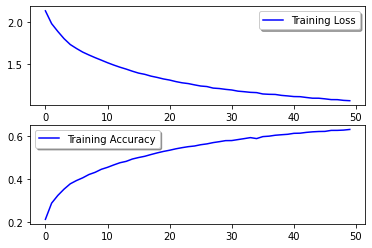

In [24]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

Prediction results including accuracy

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test)


313/313 [==============================] - 12s 39ms/step - loss: 1.0339 - acc: 0.6448
